# An Analysis of

### Authored by: Gavin Crisologo, Josue Melendez, Caleb Solomon, & Matthew Yu



## Table of Contents
### Introduction
### [Part 1: Data Collection](#Part-1--Data-Collection)
### [Part 2: Data Cleaning](#Part-2--Data-Cleaning)
### [Part 3- Exploratory Data Analysis](#Part-3--Exploratory-Data-Analysis)
### [Part 4- Model Implementation](#Part-4--Model-Implementation)
### [Part 5- Visualizations](#Part-5--Visualizations)
### [Part 6- Conclusions](#Part-6--Conclusions)

## Introduction

Welcome! When discussing data science in the field of finance and economics, things can be confusing. Not only are there plenty of ways to use data science in economics but there are dozens of topics that can be covered, such as economic forecasting or financial consulting. To make this learning process easier for any prospective data scientist, this tutorial has been made to guide you through the process of obtaining data, cleaning it, and modeling it for any future projects. For the purposes of this tutorial, we will be looking at using data science principles in the context of modeling economic health using GDP and GDP per capita..

But what are Gross Domestic Product and Gross Domestic Product per capita?

Gross Domestic Product, otherwise known as GDP, is the measure of the total monetary value of all goods and services produced in a country throughout a period of time and is typically measured anually. It is an enormous measurement, accounting for everything from gum at a gas station to professional medical services. It represents the production power of an economy and is used in a variety of applications from economic forecasting to policy making to business and investment strategies. 

Gross Domestic Product per capita refers to an individuals average economic output. It is measured by dividing Gross Domestic Product by the population size. GDP per capita provides an indicaor for the economic prosperity and standard of living within a country. 

Throughout this tutorial we will be referring to any instance of Gross Domestic Product as GDP, and will be using a GDP per capita dataset alongside a C02 per capita and daily income datasets to create future GDP per capita predictions. To learn more about GDP per capita, its definition and its uses please visit [here](https://www.investopedia.com/terms/p/per-capita-gdp.asp).

But how can we use it?

Often, when discussing how to use various metrics such as GDP, the "how" of the process is often overlooked or neglected. While it is not wrong to say GDP data can be used for all sorts of things, there are various questions as to how to clean, organize, and use the data that arise in the process. These questions are what the tutorial will answer today. 

Throughout the tutorial we will be covering the following aspects of data science in the context of GDP data:

1. Data Collection
2. Data Cleaning 
3. Exploratory Data Analysis
4. Model Implementation 
5. Visualization
6. Conclusions and Next Steps






## Part 1- Data Collection

As mentioned in the [Introduction](#introduction), we will be using 3 data sets to create machine learning models and predict future GDP per capita. The 3 datasets contain data relating to:

1. Previous GDP per capita
2. CO2 Emissions per capita
3. Daily income

All three datasets used here have been gathered from Gapminder. Gapminder is an educational non-profit that aims to "fight devastating ignorance" and tackles misconceptions regarding trending topics by using reliable data to create teaching materials to rid people of their ignorance. To this end, Gapminder has allowed free access to various relevant and reliable datasets, allowing anyone to freely access their datasets and use the data to educate themselves. If you're interested in learning more about Gapminder, its mission, and its resources please go [here](https://www.gapminder.org/).

We have aditionally provided a guide on how to access every dataset used. Each dataset detailed below provides a link to Gapminders dataset directory, along with instructions on how to go about finding the specific dataset used. Finally, each dataset provides a link to learn more about the set and how it can be used.

GDP per capita dataset from: https://www.gapminder.org/data/  (gdp_pcap.csv)
1) Select an indicator
2) Economy
3) Incomes & growth
4) GDP per capita

Additional information about the dataset can be found at:  
http://gapm.io/dgdpcap_cppp

CO2 Emissions per capita dataset from: https://www.gapminder.org/data/  (co2_pcap_cons.csv)
1) Select an indicator
2) CO2 Emissions per capita

Additional information about the dataset can be found at:  
http://gapm.io/dco2_consumption_historic

Daily income dataset from: https://www.gapminder.org/data/  (mincpcap_cppp.csv)
1) Select an indicator
2) Daily income

Additional information about the dataset can be found at:  
http://gapm.io/dmincpcap_cppp

## Part 2- Data Cleaning

Now that our datasets have been collected, it is time to clean them. Cleaning data refers to adjusting the contents of datasets to correct for errors and missing data, as well as prepare the dataset itself for visualization and further analysis. This is done to ensure the reliability and accuracy of our data and analysis, as "dirty" datasets can lead to various errors such as inaccurate predictions, biased results, etc. We first begin by importing any and all necessary libraries.

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

We begin by using pandas (imported above) to read in the dataset csv's, gathered from downloading the datasets from Gapminder. Pandas provides a useful function called read_csv() that will take in the string name of the datasets as in argument, and will read in the datasets to pandas DataFrames.

Pandas is a python library that is regularly used by data scientists to clea, explore, and analyze various datasets. To learn more about pandas and its capabilities please visit [this link](https://pandas.pydata.org/)

In [2]:
# Load data from CSVs to pandas DataFrames
co2_percap = pd.read_csv('co2_pcap_cons.csv')
gdp_percap = pd.read_csv('gdp_pcap.csv')
inc_day = pd.read_csv('mincpcap_cppp.csv')

We then display the raw, unclean, data to get a glimpse of the structure of the data. We see that is structured with countries as rows, columns as years and its respective subject as a field (ex: C02 emissions), allowing for easy access.

In [3]:
# Display GDP per capita dataset
print("\nGDP Per Capita Data:")
print(gdp_percap.head())


GDP Per Capita Data:
       country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0  Afghanistan   599   599   599   599   599   599   599   599   599  ...   
1       Angola   465   466   469   471   472   475   477   479   481  ...   
2      Albania   585   587   588   590   592   593   595   597   598  ...   
3      Andorra  1710  1710  1710  1720  1720  1720  1730  1730  1730  ...   
4          UAE  1420  1430  1430  1440  1450  1450  1460  1460  1470  ...   

    2091   2092   2093   2094   2095   2096   2097   2098   2099   2100  
0   4800   4910   5030   5150   5270   5390   5520   5650   5780   5920  
1  24.8k  25.3k  25.9k  26.4k  26.9k  27.4k    28k  28.5k  29.1k  29.6k  
2    54k  54.6k  55.2k  55.8k  56.4k  56.9k  57.5k  58.1k  58.7k  59.2k  
3  79.3k  79.5k  79.8k  80.1k  80.4k  80.7k    81k  81.2k  81.5k  81.8k  
4  92.5k  92.6k  92.6k  92.7k  92.8k  92.9k  92.9k    93k  93.1k  93.1k  

[5 rows x 302 columns]


In [4]:
# Display CO2 per capita dataset
print("CO2 Per Capita Consumption Data:")
print(co2_percap.head())

CO2 Per Capita Consumption Data:
       country   1800   1801   1802   1803   1804   1805   1806   1807   1808  \
0  Afghanistan  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
1       Angola  0.009  0.009  0.009  0.009  0.009  0.009  0.010  0.010  0.010   
2      Albania  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
3      Andorra  0.333  0.335  0.337  0.340  0.342  0.345  0.347  0.350  0.352   
4          UAE  0.063  0.063  0.064  0.064  0.064  0.064  0.065  0.065  0.065   

   ...  2013    2014    2015    2016    2017    2018    2019    2020    2021  \
0  ...  0.28   0.253   0.262   0.245   0.247   0.254   0.261   0.261   0.279   
1  ...  1.28   1.640   1.220   1.180   1.150   1.120   1.150   1.120   1.200   
2  ...  2.27   2.250   2.040   2.010   2.130   2.080   2.050   2.000   2.120   
3  ...   5.9   5.830   5.970   6.070   6.270   6.120   6.060   5.630   5.970   
4  ...    27  26.800  27.000  26.700  23.900  23.500  21.200  19.700  20.700   


In [5]:
# Display Daily income dataset
print("\nIncome Per Capita Data:")
print(inc_day.head())


Income Per Capita Data:
       country   1800   1801   1802   1803   1804   1805   1806   1807   1808  \
0  Afghanistan  1.330  1.330  1.330  1.330  1.330  1.330  1.330  1.330  1.330   
1       Angola  0.779  0.781  0.785  0.789  0.791  0.795  0.799  0.802  0.806   
2      Albania  0.919  0.921  0.924  0.927  0.929  0.932  0.935  0.937  0.940   
3      Andorra  1.880  1.880  1.880  1.890  1.890  1.890  1.900  1.900  1.900   
4          UAE  1.650  1.660  1.670  1.670  1.680  1.680  1.690  1.700  1.700   

   ...   2091   2092   2093   2094   2095   2096   2097   2098   2099   2100  
0  ...   10.7   10.9   11.2   11.4   11.7   12.0   12.3   12.6   12.8   13.2  
1  ...   19.8   20.2   20.6   21.0   21.4   21.9   22.3   22.7   23.2   23.6  
2  ...   56.7   57.4   58.0   58.6   59.2   59.8   60.5   61.1   61.7   62.3  
3  ...   87.1   87.4   87.8   88.1   88.4   88.7   89.0   89.3   89.6   89.9  
4  ...  102.0  102.0  102.0  102.0  102.0  102.0  102.0  102.0  102.0  103.0  

[5 rows x 302

From here, we begin to filter out DataFrames to ensure we only work with relevant data. We go about this by first identifying common countries within each dataset and storing it within a variable labeled 'common_countries'. We then take the dataframes made for each data and filter out any country that is not within all 3 datasets. This allows us to have complete data for every country that we modeled, avoiding potential errors that can arise when examining a country that is in one dataset but not another. (An example of this would be if 'El Salvador' was within the GDP per capita dataset, but was not within the C02 emissions per capita dataset).

In [6]:
# Identify common countries across all three datasets
common_countries = set(co2_percap['country']) & set(gdp_percap['country']) & set(inc_day['country'])

# Filter DataFrames and keep only the common countries
co2_percap = co2_percap[co2_percap['country'].isin(common_countries)]
gdp_percap = gdp_percap[gdp_percap['country'].isin(common_countries)]
inc_day = inc_day[inc_day['country'].isin(common_countries)]

''' Note: We have placed the filtered datasets back into their original Dataframes, however typically different variables are used to ensure
the original versions of the Dataframes are maintained. This is done in case the original dataframes are needed further down the line,
such that it will be possible to access different version of the dataframes and rerun an ipynb file without causing any errors. '''

' Note: We have placed the filtered datasets back into their original Dataframes, however typically different variables are used to ensure\nthe original versions of the Dataframes are maintained. This is done in case the original dataframes are needed further down the line,\nsuch that it will be possible to access different version of the dataframes and rerun an ipynb file without causing any errors. '

The datasets we use contain predicted values from 2024 and onwards. As it is currently May, 2024 we only want data prior to 2024, as that will be actual measurements rather than predicted. We will use this to compute our predictions. This is done using python list comprehension, and allows us to gather all of the columns we're keeping from each dataset, and then filter our dataframes to only contain these columns

In [7]:
# Drop columns with years > 2024 (to avoid predictions not our own)
columns_to_keep_co2 = ['country'] + [col for col in co2_percap.columns[1:] if col.isdigit() and int(col) <= 2024]
columns_to_keep_gdp = ['country'] + [col for col in gdp_percap.columns[1:] if col.isdigit() and int(col) <= 2024]
columns_to_keep_inc = ['country'] + [col for col in inc_day.columns[1:] if col.isdigit() and int(col) <= 2024]

# Replace data in our Dataframes with only the data we want to keep
co2_percap = co2_percap[columns_to_keep_co2]
gdp_percap = gdp_percap[columns_to_keep_gdp]
inc_day = inc_day[columns_to_keep_inc]

After ensuring the data within our Dataframes is relevant, we will now clean the data itself to ensure it can be used properly.

Before cleaning the data, it is presented as a numeric, which can be represented in forms such as "1,000" and and "−20", which while readable cannot be properly utilized within python functions (Note: − is not the typical hyphen -, and so it must be converted). We wish to convert these numers into floats, which are represented as "1000" and "-20" and can be properly utilized within python functions. We do so by defining a function 'num_to_float' that will take in a pandas a Dataframe, and will then convert the numerics to strings, replacing all appropriate characters. From there, it will call the built in pandas function to_numeric that will take in these strings and convert them to their respective float counterparts. This is then called on every dataframe we have and our data is now clean.

In [8]:
# Convert numerics to floats and coerce errors to homogenize dataset
def num_to_float(df):
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').str.replace('−', '-'), errors='coerce')
    return df

co2_percap = num_to_float(co2_percap)
gdp_percap = num_to_float(gdp_percap)
inc_day = num_to_float(inc_day)

After cleaning our data, we then run a null check on our dataframes, and will check to see which datasets contain null values. 

Note: Null is not always a bad thing. In the case of GDP per capita data, some countries did not exist within the time ranges within the dataset. (As an example: South Sudan was established in 2011)

In [9]:
# Check for null values in each dataframe
print("\nNull values in CO2 Per Capita Data:")
print(co2_percap.isnull().sum().sum())
print("\nNull values in GDP Per Capita Data:")
print(gdp_percap.isnull().sum().sum())
print("\nNull values in Daily Income Data:")
print(inc_day.isnull().sum().sum())


Null values in CO2 Per Capita Data:
0

Null values in GDP Per Capita Data:
5989

Null values in Daily Income Data:
0


Now that all datasets have been filtered and null checked, we display the head of our data to get a glimpse of what the data may look like.

In [10]:
# Display the first few rows of each filtered dataframe
print("\nFiltered CO2 Per Capita Data:")
print(co2_percap.head())
print("\nFiltered GDP Per Capita Data:")
print(gdp_percap.head())
print("\nFiltered Daily Income Data:")
print(inc_day.head())


Filtered CO2 Per Capita Data:
       country   1800   1801   1802   1803   1804   1805   1806   1807   1808  \
0  Afghanistan  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
1       Angola  0.009  0.009  0.009  0.009  0.009  0.009  0.010  0.010  0.010   
2      Albania  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
3      Andorra  0.333  0.335  0.337  0.340  0.342  0.345  0.347  0.350  0.352   
4          UAE  0.063  0.063  0.064  0.064  0.064  0.064  0.065  0.065  0.065   

   ...   2013    2014    2015    2016    2017    2018    2019    2020    2021  \
0  ...   0.28   0.253   0.262   0.245   0.247   0.254   0.261   0.261   0.279   
1  ...   1.28   1.640   1.220   1.180   1.150   1.120   1.150   1.120   1.200   
2  ...   2.27   2.250   2.040   2.010   2.130   2.080   2.050   2.000   2.120   
3  ...   5.90   5.830   5.970   6.070   6.270   6.120   6.060   5.630   5.970   
4  ...  27.00  26.800  27.000  26.700  23.900  23.500  21.200  19.700  20.700

## Part 3- Exploratory Data Analysis

Now that we have clean, relevant data to work with, we will conduct an Exploratory Data Analysis, or EDA for short. An EDA typically consists of getting know and understand the data and using descriptive methods to note the general patterns within the data. 

It is not meant to be an in depth method of observation, so the techniques used within this EDA will aim to model the generalities within our Dataframes, to inform of us general patterns we can use to build our models, our predictions and create a more accurate, in depth analysis later on. This EDA consists of first examining each dataset in its entirity to note general trends, and then honing in on specific years and relevant criteria later on, which will allow us to further develop our hypothesis.


The first step in our EDA is to examine our datasets visually, allowing us to draw some conlcusions from visual trends. We do this utilizing matplotlib (imported in part 2), a python library that is commonly used to visualize datasets, and will be useful in visualizing our Dataframes.

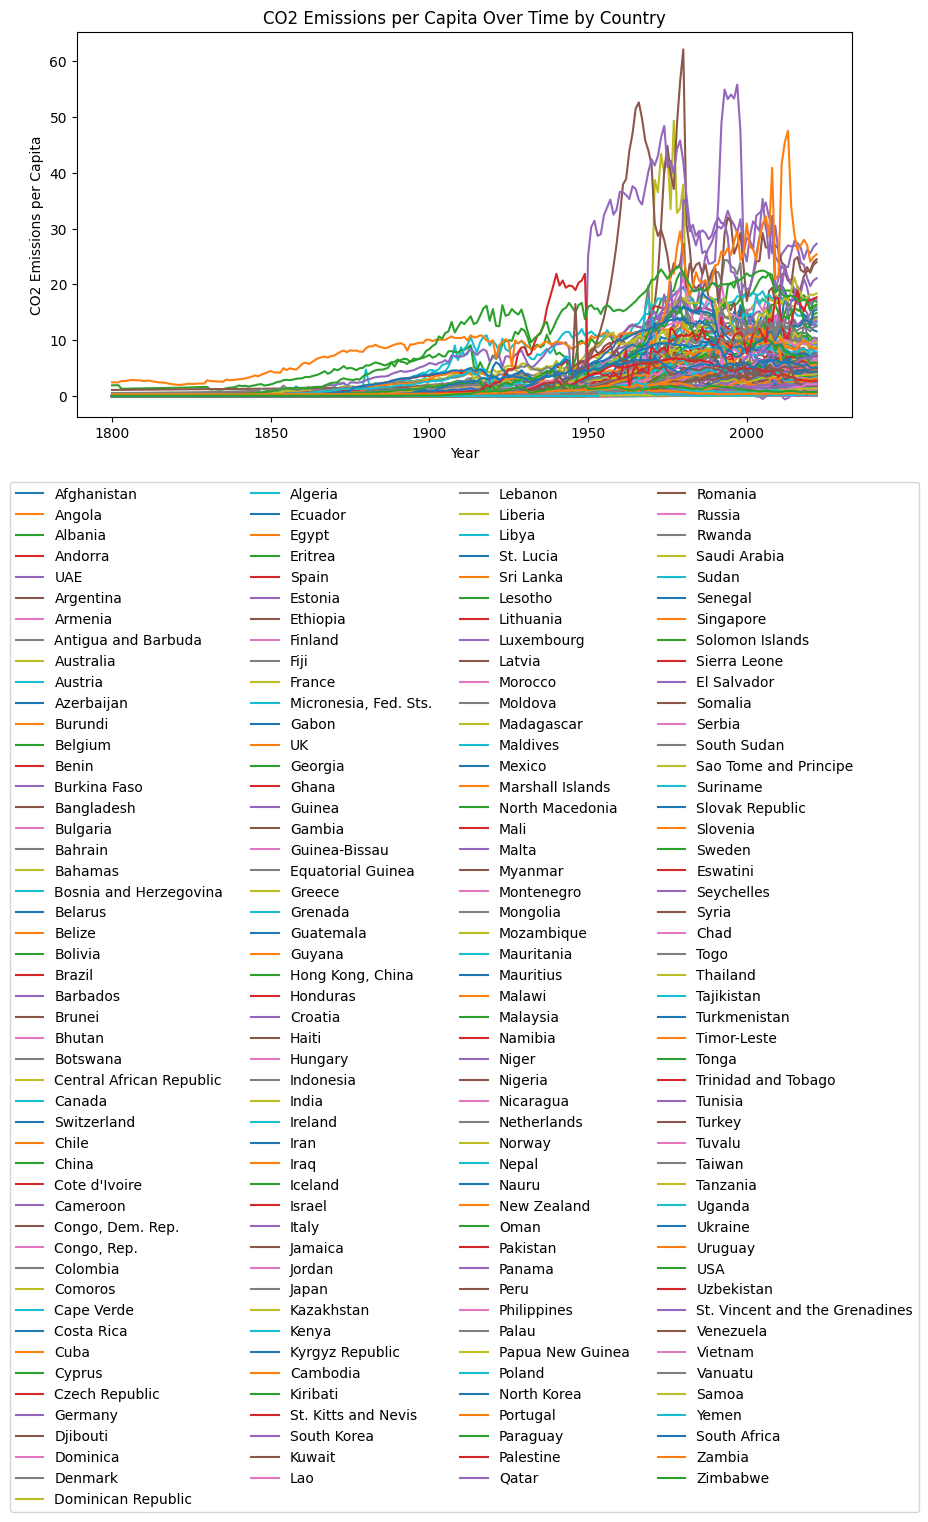

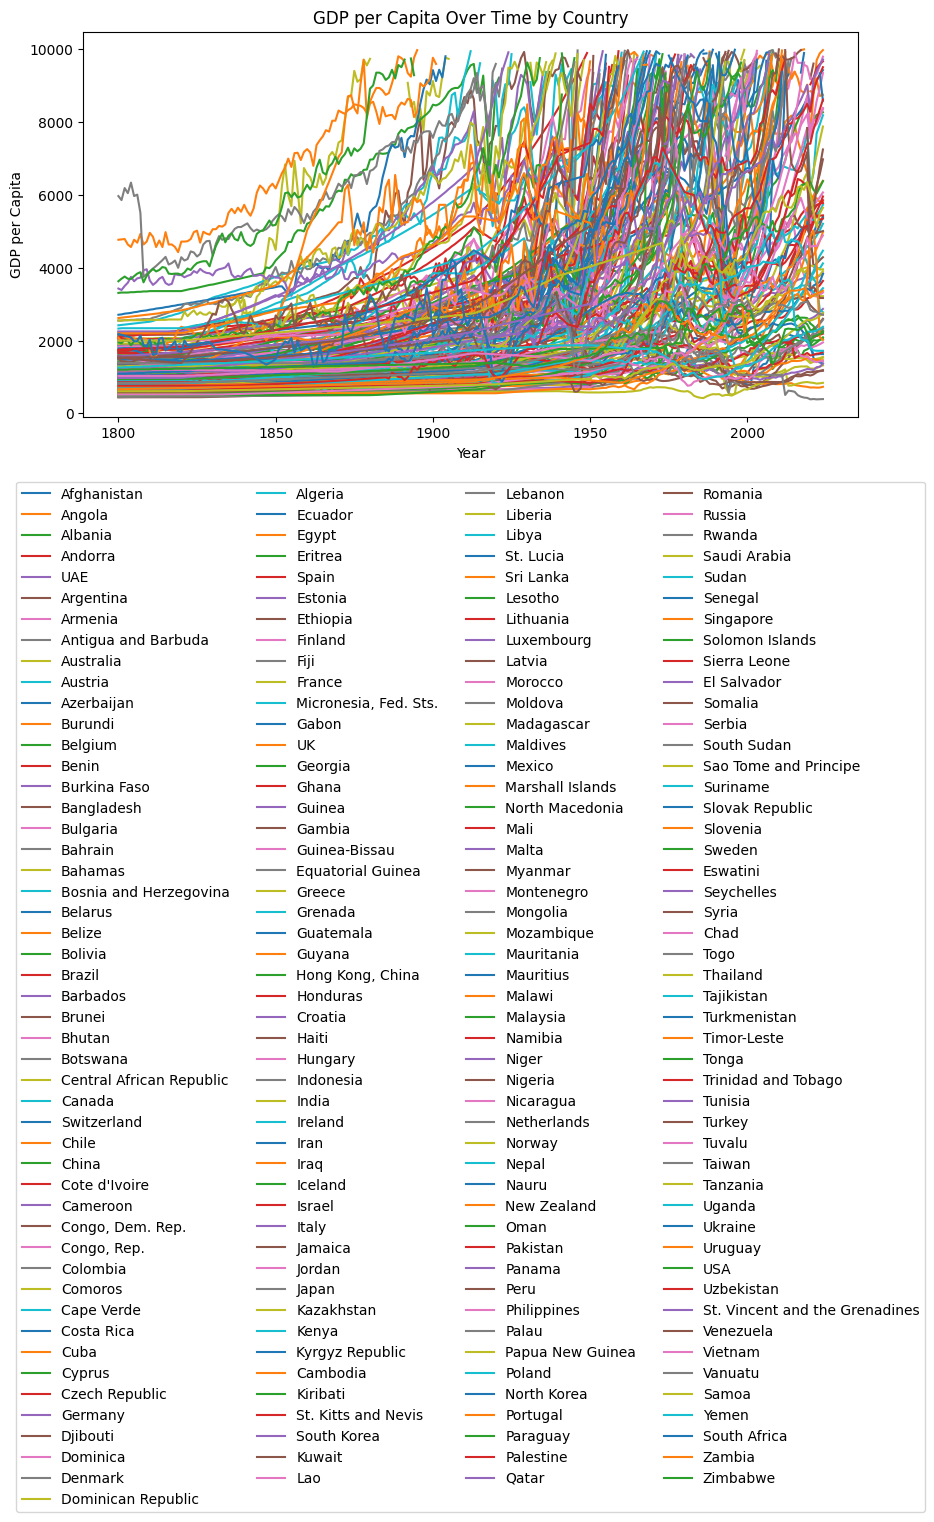

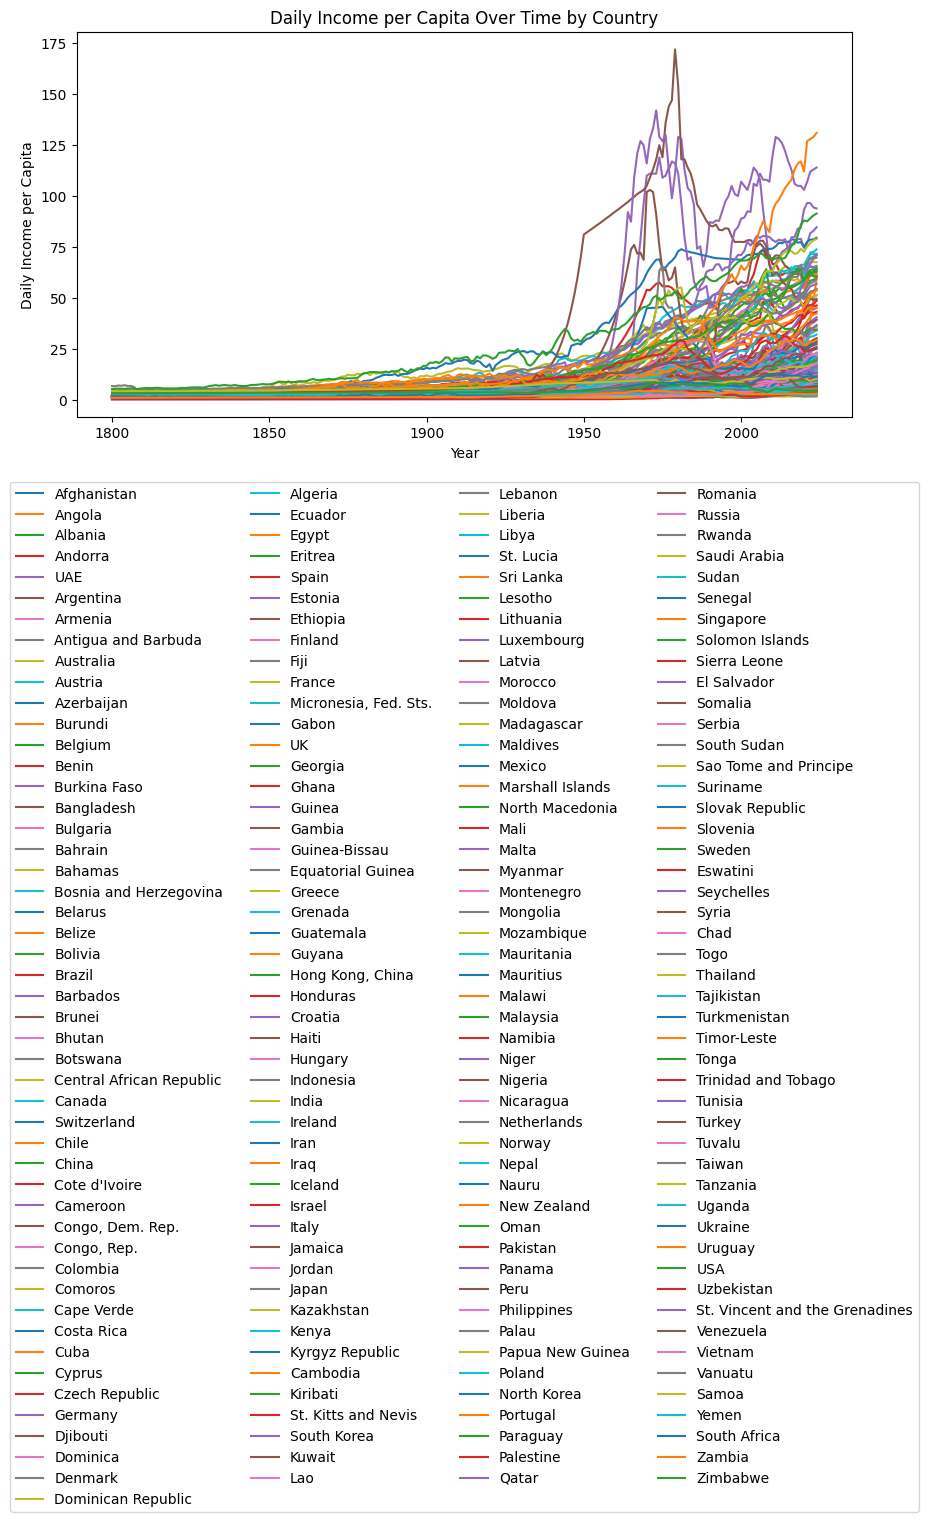

In [18]:
# Plot CO2 per capita over time for each country
plt.figure(figsize=(10, 5))
# for every country in the C02 dataset, extract the current year, and the emission related 
# with that year and plot it.
for country in co2_percap['country']:
    # extracting year and emission
    years = co2_percap.columns[1:].astype(int)
    emissions = co2_percap[co2_percap['country'] == country].values[0][1:].astype(float)
    # plot the emission related the current year, with a label pertaining to the current country
    plt.plot(years, emissions, label=country)
# create the x-axis label, y-axis label, and graph title
plt.xlabel('Year')
plt.ylabel('CO2 Emissions per Capita')
plt.title('CO2 Emissions per Capita Over Time by Country')
# Tighten the legend so the plot isn't so big
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.show()

# Plot GDP per capita over time for each country
plt.figure(figsize=(10, 5))
# for every country in the GDP per capita dataset, extract the current year, and the 
# GDP related with that year and plot it.
for country in gdp_percap['country']:
    # extracting year and GDP
    years = gdp_percap.columns[1:].astype(int)
    gdp = gdp_percap[gdp_percap['country'] == country].values[0][1:].astype(float)
    # plot the GDP related the current year, with a label pertaining to the current country
    plt.plot(years, gdp, label=country)
# create the x-axis label, y-axis label, and graph title
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita Over Time by Country')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4) 
plt.show()

# Plot Daily Income per capita over time for each country
plt.figure(figsize=(10, 5))
# for every country in the Daily Income dataset, extract the current year, and the 
# income related with that year and plot it.
for country in inc_day['country']:
    # extracting year and income
    years = inc_day.columns[1:].astype(int)
    income = inc_day[inc_day['country'] == country].values[0][1:].astype(float)
    # plot the GDP related the current year, with a label pertaining to the current country
    plt.plot(years, income, label=country)
# create the x-axis label, y-axis label, and graph title
plt.xlabel('Year')
plt.ylabel('Daily Income per Capita')
plt.title('Daily Income per Capita Over Time by Country')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.show()


Clearly, these graphs are massive and cluttered; while there is an apparent general upward trend in all cases (as we would expect), the GDP per capita graph especially is incredibly difficult to read, and indeed very little useful information can be garnered from it. Consequently we would like to analyze smaller samples of the data to perhaps gain a greater understanding of interesting sub-trends that a model could perhaps generalize. We take the following four potentially interesting cases based on a knowledge of history and a cursory glance at the above. For each of these, we provide a set of three graphs, one for each dataset, to visualize each of our three metrics.

1) High Emissions Countries

Such countries would be those with the broadest industrialization infrastructure that we expect to have massive carbon emissions. For these, we include the USA, China, Russia, India, and Japan.

2) Various European Countries

This allows us to get a gauge of potential trends on one subregion of the world.

3) "Developed" Countries

A set of countries considered to be "developed," first-world nations. We should expect these to have matured industrial economies.

4) "Developing" Countries

Opposite case 3, this might give us a gauge of potential trends (or potential volatility!) of nations whose industrial economies and transition we might not expect to have completely stabilized.

Now that limiting criteria have been defined, we will create a function called 'plot_data' that will iterate through the datasets and for every limiting criteria set, such as High Emission Countries, generate 3 subplots that will show C02 Emissions Per Capita, GDP per capita, and Daily Income per capita respectively.

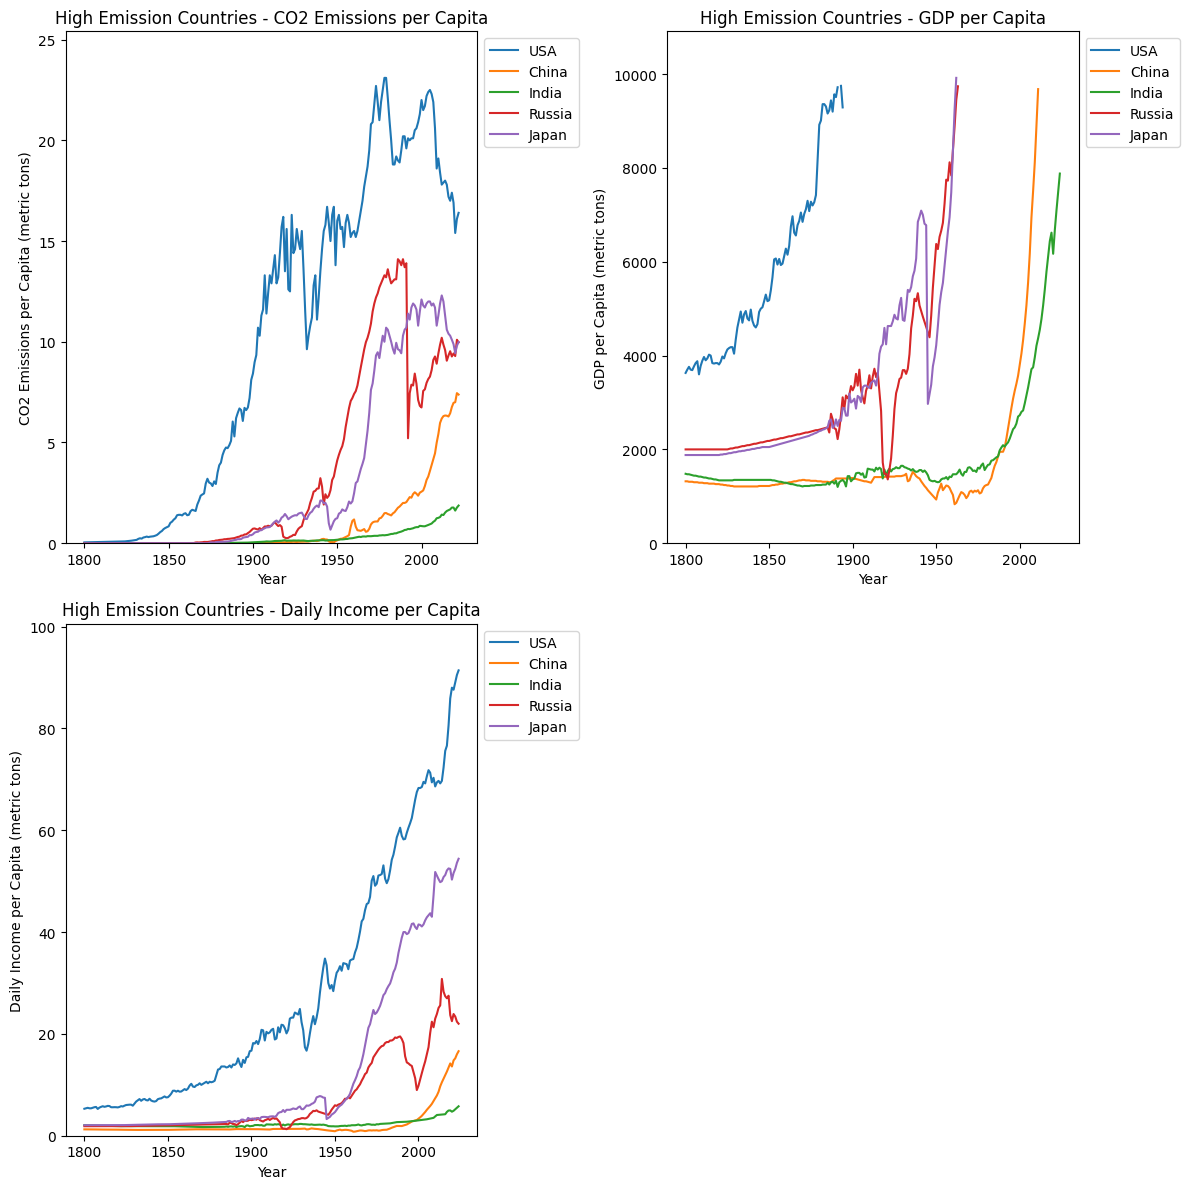

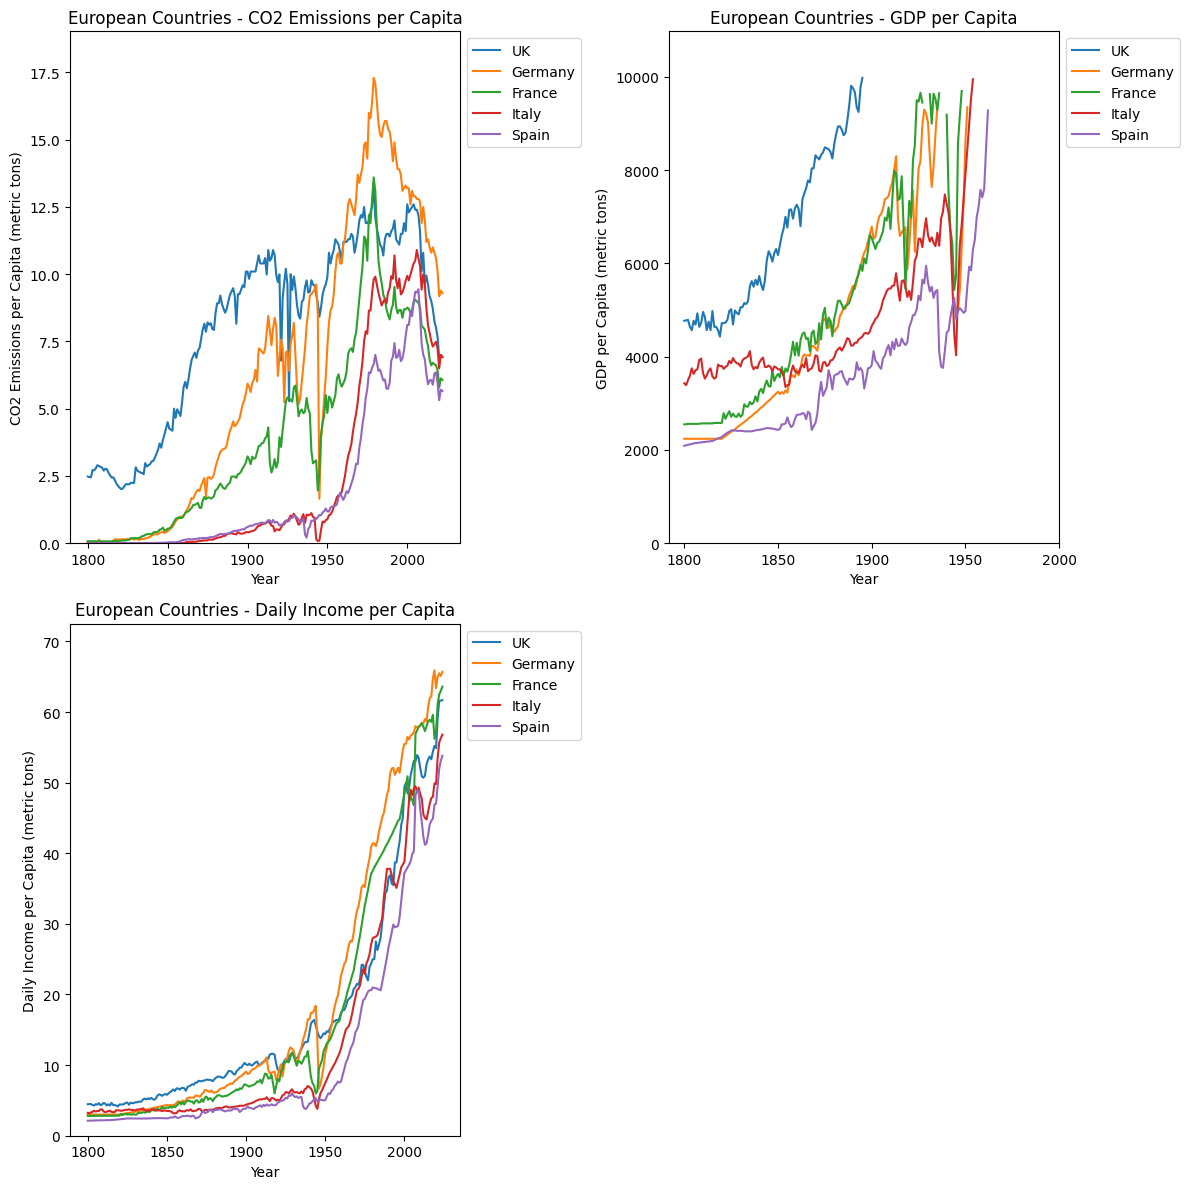

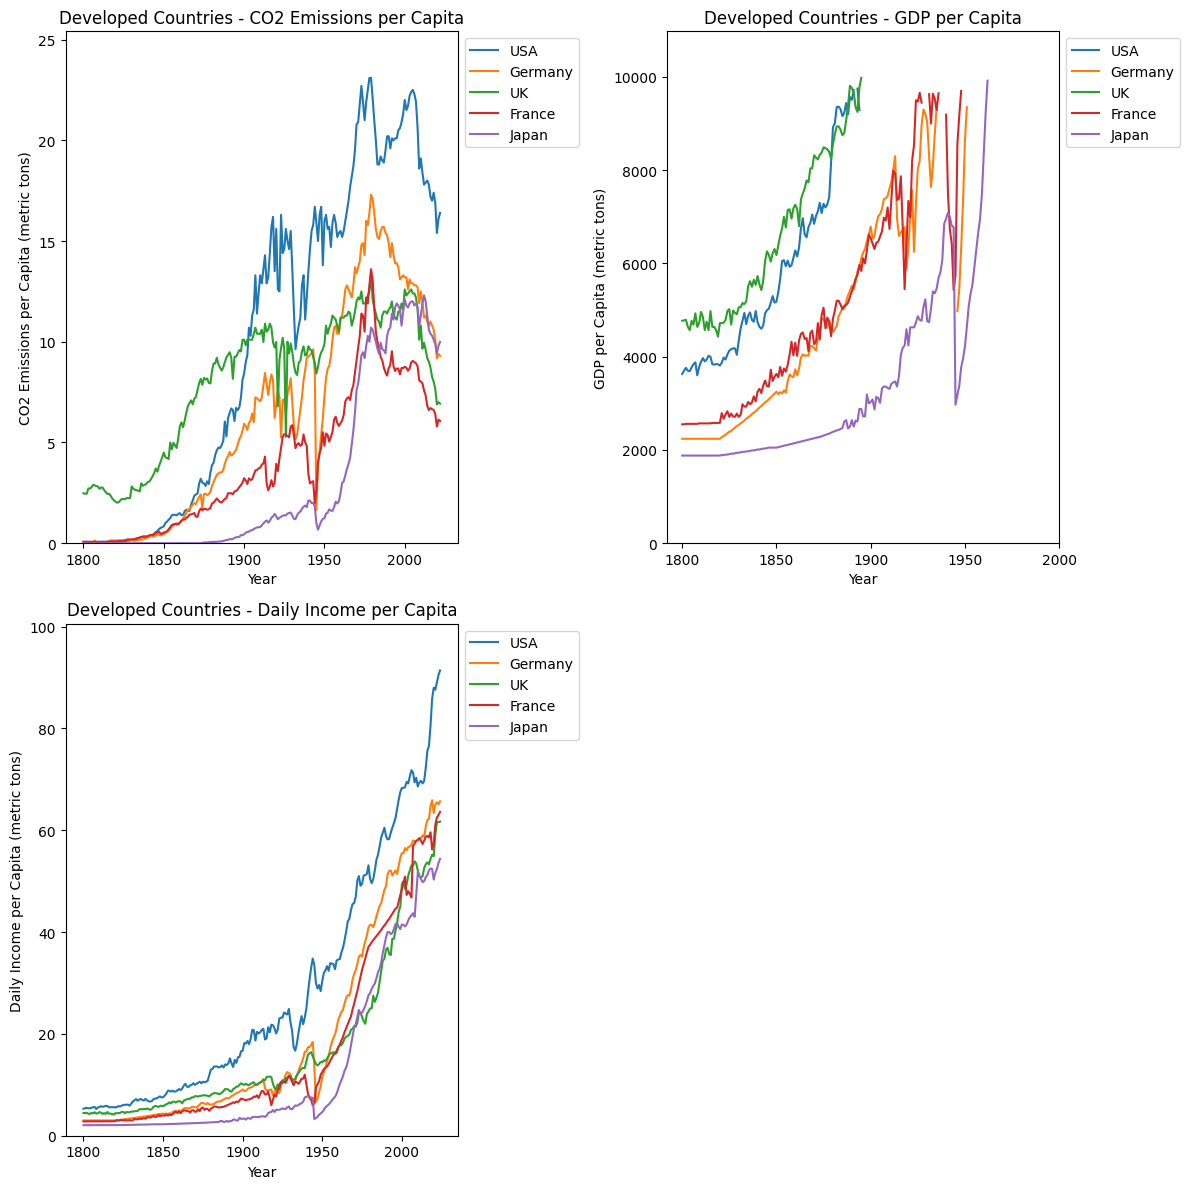

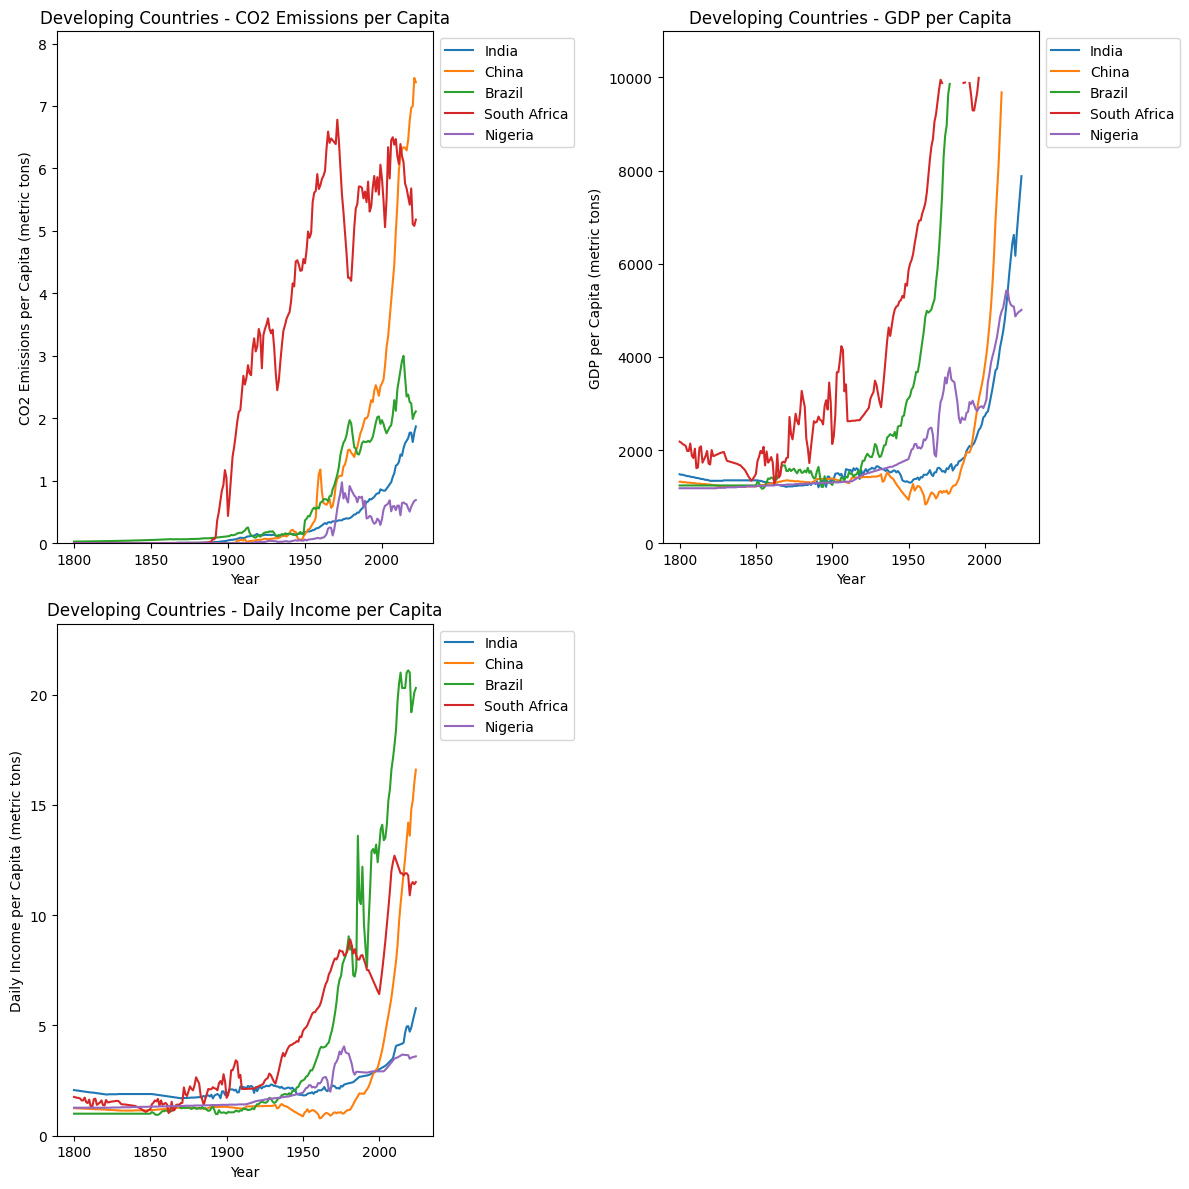

In [12]:
limiting_criteria_sets = [
    ('High Emission Countries', ['USA', 'China', 'India', 'Russia', 'Japan']),
    ('European Countries', ['UK', 'Germany', 'France', 'Italy', 'Spain']),
    ('Developed Countries', ['USA', 'Germany', 'UK', 'France', 'Japan']),
    ('Developing Countries', ['India', 'China', 'Brazil', 'South Africa', 'Nigeria'])
]

# Function to plot CO2 Emissions per Capita, GDP per Capita, and Income per Day data for a given set of countries
def plot_data(countries, title_prefix, datasets, set_names):
    # Generate a figure
    fig = plt.figure(figsize=(12, 12))
    
    # Loop through datasets
    for i in range(len(datasets)):
        # Grab years and generate a subplot grid
        years = datasets[i].columns[1:].astype(int)
        ax = plt.subplot2grid((2, 2), (i // 2, i % 2))
        
        # Keep the max for margin cutoffs
        m = 0
        for country in countries:
            # Iterate through countries in the limiting sets, grabbing and adding their data
            data = datasets[i][datasets[i]['country'] == country].values[0][1:].astype(float)
            ax.plot(years, data, label=country)
            m = max(m, max(data))

        # Labeling and cleaning
        ax.set_ylabel(f'{set_names[i]} per Capita (metric tons)')
        ax.set_xlabel('Year')
        ax.set_xticks(years[::50]) # 50 year increments for cleanliness

        ax.set_title(f'{title_prefix} - {set_names[i]} per Capita')
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.set_ylim(0, m * 1.1)  # Ensure y-axis includes all data

    plt.tight_layout()
    plt.show()

# Loop over each set of limiting criteria and generate CO2 Emissions per Capita, GDP per Capita, and Income per Day (per capita) plots
for title_prefix, countries in limiting_criteria_sets:
    plot_data(countries, title_prefix, [co2_percap, gdp_percap, inc_day], ['CO2 Emissions', 'GDP', 'Daily Income'])


From these plots, we can see general, upwards exponential-like trends; however, as reflected in the original large graphs and still visible from these, GDP per capita is much more volatile than the other two measures. As a potentially interesting question, we now ask if there is any relationship between carbon dioxide emissions per capita and the GDP per capita in predicting daily income; that is, do changes in what we might expect to be an indicator of a mature, industrial economy, as well as changes in the GDP, predict the direction and magnitude of the change in income per capita?

## Part 4- Model Implementation

We want to use all data prior to 2015 as training data. We'll then set up a univariate model to predict income per day based solely on co2 emissions, and then a multivariate model based on co2 emissions and gdp per capita as predictors to see if the inclusion of gdp improves the model performance. For our model, we will use gradient descent.

First, we create our test sets of data:

In [14]:
# Using data prior to 2015 as the test dataset
co2_percap_train = co2_percap.drop(columns=[str(year) for year in range(2015, 2023)])
gdp_percap_train = gdp_percap.drop(columns=[str(year) for year in range(2015, 2023)])
inc_day_train = inc_day.drop(columns=[str(year) for year in range(2015, 2023)])

# Get all country averages
co2_percap_mean = co2_percap_train.set_index('country').mean(axis=1).reset_index()
gdp_percap_mean = gdp_percap_train.set_index('country').mean(axis=1).reset_index()
inc_day_mean = inc_day_train.set_index('country').mean(axis=1).reset_index()

# Merge datasets on country
merged_data = co2_percap_mean.merge(gdp_percap_mean, on='country').merge(inc_day_mean, on='country')
merged_data.columns = ['country', 'CO2_per_capita', 'GDP_per_capita', 'Income_per_capita']

We next set up our dependent and indepent variables for each model.

In [15]:
# Prepare two predictor sets: a univariate and a multivariate set
X_univariate = merged_data[['CO2_per_capita']].values
X_multivariate = merged_data[['CO2_per_capita', 'GDP_per_capita']].values
y = merged_data['Income_per_capita'].values

# Add intercept term for each
X_univariate = np.hstack((np.ones((X_univariate.shape[0], 1)), X_univariate))
X_multivariate = np.hstack((np.ones((X_multivariate.shape[0], 1)), X_multivariate))

# Normalize features based on calc mean
scaler = MinMaxScaler()
X_univariate[:, 1:] = scaler.fit_transform(X_univariate[:, 1:])
X_multivariate[:, 1:] = scaler.fit_transform(X_multivariate[:, 1:])

# Gradient descent
def grad_descent(X, y, T, alpha):
    m, n = X.shape  # m = #examples, n = #features
    theta = np.zeros(n)
    f = np.zeros(T)  # loss
    for i in range(T):
        # loss for current parameter vector theta
        f[i] = 0.5 * np.linalg.norm(X.dot(theta) - y)**2
        # compute steepest ascent at f(theta)
        g = np.transpose(X).dot(X.dot(theta) - y)
        # step down the gradient
        theta = theta - alpha * g
    return theta, f # return loss as well

## Part 5- Visualizations

Finally, we train each of the models, and display loss over epochs for each.

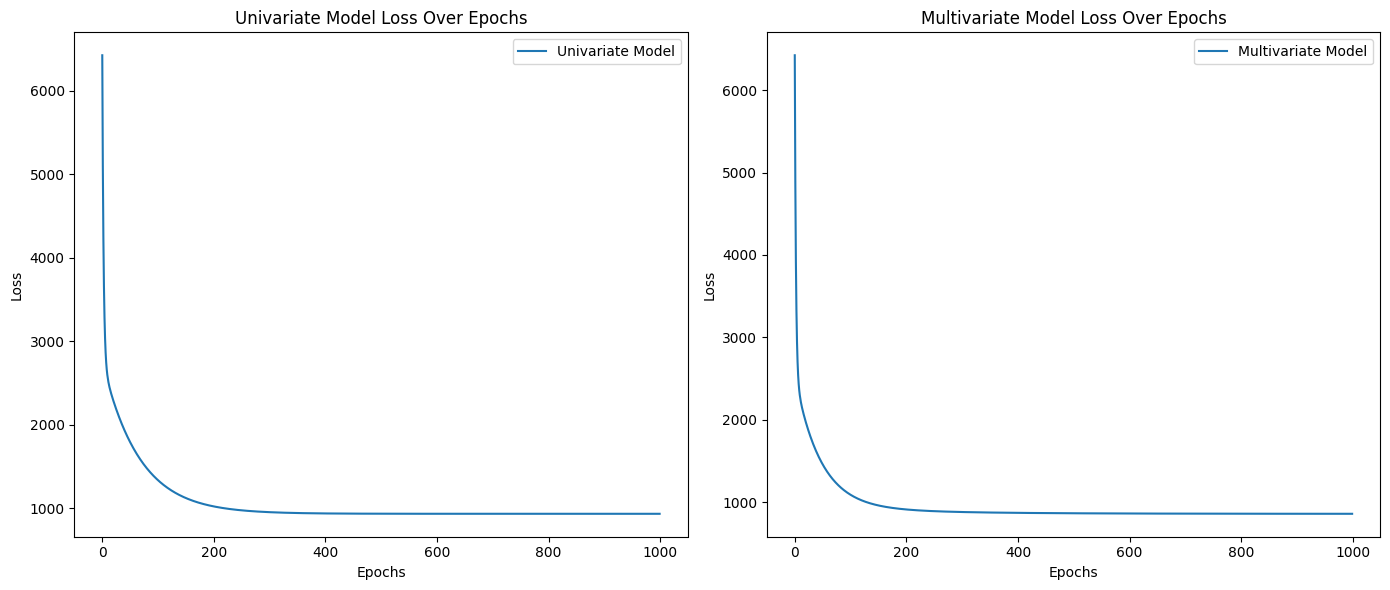

MSE for Univariate Model: 9.704041352165593
MSE for Multivariate Model: 8.896846419331379


In [16]:
# Training parameters
T = 1000
alpha = 0.001 # lower alpha for multivariate as well

# Train univariate model
theta_uni, loss_uni = grad_descent(X_univariate, y, T, alpha)

# Train multivariate model
theta_multi, loss_multi = grad_descent(X_multivariate, y, T, alpha)

# Plot loss over epochs
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(T), loss_uni, label='Univariate Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Univariate Model Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(T), loss_multi, label='Multivariate Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Multivariate Model Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate MSE for univariate and multivariate models
mse_training_univariate = np.mean((X_univariate.dot(theta_uni) - y)**2)
mse_training_multivariate = np.mean((X_multivariate.dot(theta_multi) - y)**2)

print(f'MSE for Univariate Model: {mse_training_univariate}')
print(f'MSE for Multivariate Model: {mse_training_multivariate}')

Next, we want to test our models on two different test datasets: for one dataset, we will use income from 2015-2019 (inclusive), and for the other, we will use 2020-2022 data (inclusive, taking into account that things may be different because of covid, so it is feasible that the model's performance could be significantly different between both of these datasets).

In [17]:
# Creates a merged dataset given a time range (inclusive)
def merge_datasets(time_range):
    co2_percap_train = co2_percap.filter(items=['country'] + [str(year) for year in range(time_range[0], time_range[1] + 1)])
    gdp_percap_train = gdp_percap.filter(items=['country'] + [str(year) for year in range(time_range[0], time_range[1] + 1)])
    inc_day_train = inc_day.filter(items=['country'] + [str(year) for year in range(time_range[0], time_range[1] + 1)])

    co2_percap_mean = co2_percap_train.set_index('country').mean(axis=1).reset_index()
    gdp_percap_mean = gdp_percap_train.set_index('country').mean(axis=1).reset_index()
    inc_day_mean = inc_day_train.set_index('country').mean(axis=1).reset_index()

    merged_data = co2_percap_mean.merge(gdp_percap_mean, on='country').merge(inc_day_mean, on='country')
    merged_data.columns = ['country', 'CO2_per_capita', 'GDP_per_capita', 'Income_per_capita']

    return merged_data

# Obtain desired data for the two testing time periods
merged_data_2015_2019 = merge_datasets([2015, 2019]).dropna()
merged_data_2020_2022 = merge_datasets([2020, 2022]).dropna()
scaler = MinMaxScaler()

# Test univariate model on 2015-2019 data
X_univariate_test = merged_data_2015_2019[['CO2_per_capita']].values
X_univariate_test = np.hstack((np.ones((X_univariate_test.shape[0], 1)), X_univariate_test))
X_univariate_test[:, 1:] = scaler.fit_transform(X_univariate_test[:, 1:])
y_univariate_pred = X_univariate_test.dot(theta_uni)

# Test multivariate model on 2015-2019 data
X_multivariate_test = merged_data_2015_2019[['CO2_per_capita', 'GDP_per_capita']].values
X_multivariate_test = np.hstack((np.ones((X_multivariate_test.shape[0], 1)), X_multivariate_test))
X_multivariate_test[:, 1:] = scaler.fit_transform(X_multivariate_test[:, 1:])
y_multivariate_pred = X_multivariate_test.dot(theta_multi)

# Calculate MSE for both models
mse_univariate = np.mean((y_univariate_pred - merged_data_2015_2019['Income_per_capita'].values)**2)
mse_multivariate = np.mean((y_multivariate_pred - merged_data_2015_2019['Income_per_capita'].values)**2)

# Print MSE for both models
print(f'MSE for Univariate Model (2015-2019): {mse_univariate}')
print(f'MSE for Multivariate Model (2015-2019): {mse_multivariate}')

# Test univariate model on 2020-2022 data
X_univariate_test = merged_data_2020_2022[['CO2_per_capita']].values
X_univariate_test = np.hstack((np.ones((X_univariate_test.shape[0], 1)), X_univariate_test))
X_univariate_test[:, 1:] = scaler.fit_transform(X_univariate_test[:, 1:])
y_univariate_pred = X_univariate_test.dot(theta_uni)

# Test multivariate model on 2020-2022 data
X_multivariate_test = merged_data_2020_2022[['CO2_per_capita', 'GDP_per_capita']].values
X_multivariate_test = np.hstack((np.ones((X_multivariate_test.shape[0], 1)), X_multivariate_test))
X_multivariate_test[:, 1:] = scaler.fit_transform(X_multivariate_test[:, 1:])
y_multivariate_pred = X_multivariate_test.dot(theta_multi)

# Calculate MSE for both models
mse_univariate = np.mean((y_univariate_pred - merged_data_2020_2022['Income_per_capita'].values)**2)
mse_multivariate = np.mean((y_multivariate_pred - merged_data_2020_2022['Income_per_capita'].values)**2)

# Print MSE for both models
print(f'MSE for Univariate Model (2020-2022): {mse_univariate}')
print(f'MSE for Multivariate Model (2020-2022): {mse_multivariate}')

MSE for Univariate Model (2015-2019): 13.867476484954366
MSE for Multivariate Model (2015-2019): 14.777744214159666
MSE for Univariate Model (2020-2022): 12.237848963255306
MSE for Multivariate Model (2020-2022): 13.134232214946179
